# Bike Sharing challange

In this notebook I will attempt to solve the bike sharing challange.<br>
See https://www.kaggle.com/c/bike-sharing-demand for further information.<br>
<br>
Since the data has very clear seasonality, I will not treat this as a TSA problem.

## EDA

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np

In [0]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")
combine = [df_train, df_test]

In [0]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.6+ KB


In [0]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [0]:
df_train.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [0]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


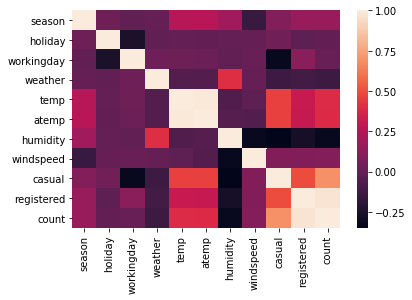

In [0]:
sns.heatmap(df_train.corr())

Interesting insights from the HeatMap:
> - casual has a negative correlation with workingday
> - high correlation betwen casual and count
> - humidity has negative correlation with casual, registered and count.
> - temp and atemp have high correlation with count and casual

What I would like to see that does not show up here:
> - correlation between year and count (we will probably need a kendal os spearman correlation dut to nonlinearity)
> - correlation between season and deviation from yearly average

In [0]:
#datetimable_df = df_train.replace(df_train['datetime'],pd.to_datetime(df_train['datetime']))

In [0]:
df_train[['datetime']] = df_train[['datetime']].apply(pd.to_datetime)
df_test[['datetime']] = df_test[['datetime']].apply(pd.to_datetime)

In [0]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


(array([ 734107.,  734197.,  734289.,  734381.,  734472.,  734563.,
         734655.,  734747.,  734838.]), <a list of 9 Text xticklabel objects>)

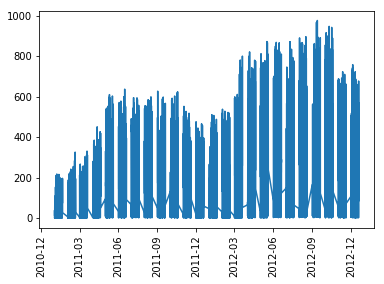

In [0]:
df_train = df_train.sort_values('datetime', ascending=True)
plt.plot(df_train['datetime'], df_train['count'])
plt.xticks(rotation='vertical')

Show significance between mean in 2011 to mean in 2012?

[Text(0,0,''),
 Text(0,0,''),
 Text(0,0,'2011-05-10'),
 Text(0,0,'2011-09-17'),
 Text(0,0,'2012-02-06'),
 Text(0,0,'2012-06-13'),
 Text(0,0,'2012-11-02'),
 Text(0,0,'')]

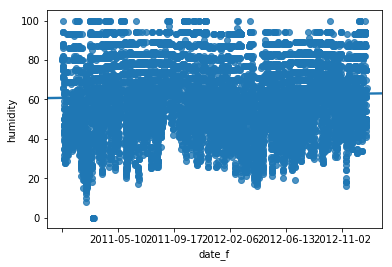

In [0]:
df_train['date_f'] = pd.factorize(df_train['datetime'])[0] + 1
mapping = dict(zip(df_train['date_f'], df_train['datetime'].dt.date))

ax = sns.regplot('date_f', 'humidity', data=df_train)
labels = pd.Series(ax.get_xticks()).map(mapping).fillna('')
ax.set_xticklabels(labels)
#sns.regplot(x=df_train['datetime'], y=df_train['humidity'])
#plt.xticks(rotation='vertical')

In [0]:
df_train.drop(columns=['date_f'], inplace=True)

TODO:
> - check for missing data
> - check for skewed variables
> - split date into year and day
> - create vatiable for deviation from yearly average (problematic because this is a time series)
> - change below variables to categorical

Make sure there are no nans:

In [0]:
df_train.isnull().values.any() and df_test.isnull().values.any()

False

check for skewed variables:

In [0]:
def plot_hist_with_log1p(feature):
    fig, ax =plt.subplots(1,2)
    sns.distplot(np.log1p(df_train[feature]), kde=False, ax=ax[0])
    sns.distplot(df_train[feature], kde=False, ax=ax[1])
    fig.show()

C:\Anaconda3\envs\deeplearning\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


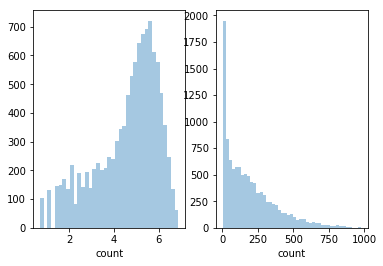

In [0]:
plot_hist_with_log1p('count')

C:\Anaconda3\envs\deeplearning\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


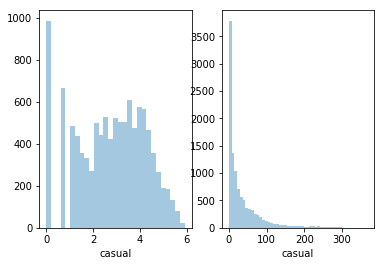

In [0]:
plot_hist_with_log1p('casual')

C:\Anaconda3\envs\deeplearning\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


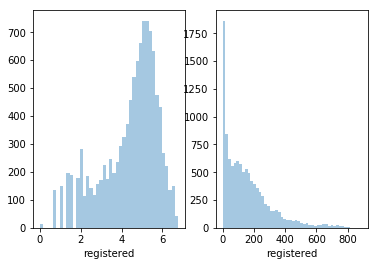

In [0]:
plot_hist_with_log1p('registered')

possible categorical variables:
> - season
> - datetime - separate the year and month
> - weather

## Feature Engineering

Two main things we will do here:
1. split datetime
2. get rid of casual and registered in  train set

In [0]:
def split_datetime(df):
    df['year'] = df['datetime'].map(lambda x: x.year)
    df['month'] = df['datetime'].map(lambda x: x.month)
    # df['day'] = df['datetime'].map(lambda x: x.day)
    df['hour'] = df['datetime'].map(lambda x: x.hour)
    df['weekday'] = df['datetime'].map(lambda x: x.weekday())
    return df

In [0]:
df_train = split_datetime(df_train)
df_train.drop(columns=['datetime', 'casual', 'registered'], inplace=True)

In [0]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 10885
Data columns (total 13 columns):
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
count         10886 non-null int64
year          10886 non-null int64
month         10886 non-null int64
hour          10886 non-null int64
weekday       10886 non-null int64
dtypes: float64(3), int64(10)
memory usage: 1.2 MB


In [0]:
df_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,hour,weekday
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,4,5


Boxplots for days of the week vs count:

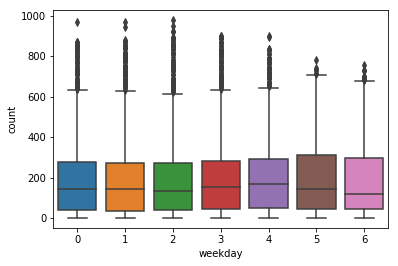

In [0]:
sns.boxplot(x=df_train['weekday'], y=df_train['count'])

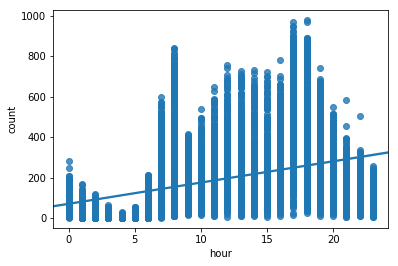

In [0]:
ax = sns.regplot('hour', 'count', data=df_train)
ax

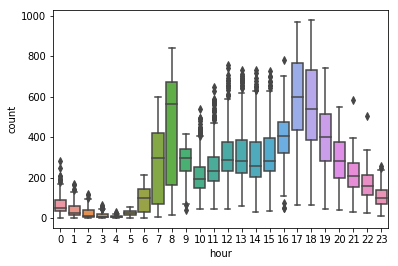

In [0]:
sns.boxplot(x=df_train[df_train.year != 2011]['hour'], y=df_train['count'])

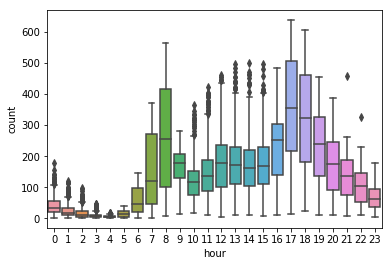

In [0]:
sns.boxplot(x=df_train[df_train.year != 2012]['hour'], y=df_train['count'])

We can see here that count follows a clear pattern:<br>
Down during night, up during rush hours, and medium during the day

In [0]:
df_train.workingday.unique()

array([0, 1], dtype=int64)

In [0]:
df_train.year.unique()

array([2011, 2012], dtype=int64)

In [0]:
df_test = split_datetime(df_test)
test_datetime = df_test['datetime']
df_test.drop(columns=['datetime'], inplace=True)

In [0]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 12 columns):
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
year          6493 non-null int64
month         6493 non-null int64
hour          6493 non-null int64
weekday       6493 non-null int64
dtypes: float64(3), int64(9)
memory usage: 608.8 KB


In [0]:
df_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour,weekday
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,0,3
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,1,3
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,2,3
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,4,3


We need to optimize for RMSLE according to the evaluation.<br>
For this we will log shift count.<br>
We need to remember later to take the exponent after predicting.

In [0]:
df_train['count'] = np.log1p(df_train['count'])

In [0]:
df_train['count'].head()

0    2.833213
1    3.713572
2    3.496508
3    2.639057
4    0.693147
Name: count, dtype: float64

I am not sure yet I want to change to categorical.

In [0]:
def define_categorical(df):
    """
    here I will defind the following to be categorical: season, year, month, weather
    note however that we might want instead
    """
    pass

## Modeling

We need a model that fulfils a number of requirnments:
> - data is approximately linear (but not exactly linear)
> - dataset is small
> - model seasonality

In [0]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

C:\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [0]:
X = df_train.drop(columns=['count'])
y = df_train['count']
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 10885
Data columns (total 12 columns):
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
year          10886 non-null int64
month         10886 non-null int64
hour          10886 non-null int64
weekday       10886 non-null int64
dtypes: float64(3), int64(9)
memory usage: 1.4 MB


In [0]:
y.head()

0    2.833213
1    3.713572
2    3.496508
3    2.639057
4    0.693147
Name: count, dtype: float64

We will select 25% to be the validation set.
We will select samples randomly so that we will get samples from various days in 2011 and 2012

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.75, test_size=0.25)

In [0]:
y_train.describe()

count    8164.000000
mean        4.584451
std         1.426174
min         0.693147
25%         3.737670
50%         4.983607
75%         5.648974
max         6.885510
Name: count, dtype: float64

In [0]:
X_train.shape

(8164, 12)

In [0]:
X_val.shape

(2722, 12)

Things to try:
* running TPOT a number of times
* running TPOT with different generations and population sizes
* think of ways to capture seasonality (count over the different seasons, count over hours) + trend (increase in count over the years)
    - training the model first on 2011 untill overfitting, then on 2011 + 2012: **NOT A GOOD IDEA ON TREE BASED MODELS!**

**TPOT** is an automated pipeline generator based on genetic algorithms.
<br><br>
It searches through multiple tree based models and parameters along with some feature selection methods and outputs the best pipeline that it found.
I will use this library for fast iteration over hyperparameters.

In [0]:
from tpot import TPOTRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

tpot = TPOTRegressor(generations=9, population_size=30, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_val, y_val))
tpot.export('tpot_boston_pipeline_4_9gen_30pop.py')

Below I will list outputs of different TPOT runs: (note that the pipelines are saved in python files)

**tpot = TPOTRegressor(generations=5, population_size=20, verbosity=2)**

1. Best pipeline: XGBRegressor(SelectPercentile(input_matrix, percentile=87), learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=100, nthread=1, subsample=0.65)    -0.000150797646945

2. Best pipeline: ExtraTreesRegressor(RandomForestRegressor(input_matrix, bootstrap=True, max_features=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=100), bootstrap=False, max_features=0.8, min_samples_leaf=6, min_samples_split=5, n_estimators=100)
-0.000151615129883

3. Best pipeline: RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.85, min_samples_leaf=1, min_samples_split=13, n_estimators=100)
-0.000259734443071

4. Best pipeline: ExtraTreesRegressor(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), bootstrap=True, max_features=0.75, min_samples_leaf=3, min_samples_split=7, n_estimators=100)
-0.000223451917089

**tpot = TPOTRegressor(generations=7, population_size=20, verbosity=2)**

1. Best pipeline: XGBRegressor(ZeroCount(input_matrix), learning_rate=0.1, max_depth=8, min_child_weight=16, n_estimators=100, nthread=1, subsample=1.0)
-0.000229089893118

2. Best pipeline: XGBRegressor(input_matrix, learning_rate=0.1, max_depth=9, min_child_weight=1, n_estimators=100, nthread=1, subsample=0.1)
-0.000567397464753

3. Best pipeline: RandomForestRegressor(input_matrix, bootstrap=True, max_features=0.95, min_samples_leaf=1, min_samples_split=11, n_estimators=100)
-0.000172377228275

4. Best pipeline: GradientBoostingRegressor(input_matrix, alpha=0.75, learning_rate=0.1, loss=ls, max_depth=10, max_features=0.8, min_samples_leaf=8, min_samples_split=13, n_estimators=100, subsample=0.85)
-0.000130923469254

**tpot = TPOTRegressor(generations=9, population_size=30, verbosity=2)**

1. Best pipeline: XGBRegressor(CombineDFs(MaxAbsScaler(input_matrix), input_matrix), learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, nthread=1, subsample=0.8)
-0.000114176476891

2. Best pipeline: XGBRegressor(SelectPercentile(input_matrix, percentile=23), learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, nthread=1, subsample=0.95)
-0.000145220541337

3. Best pipeline: GradientBoostingRegressor(MinMaxScaler(input_matrix), alpha=0.8, learning_rate=0.1, loss=ls, max_depth=7, max_features=0.8, min_samples_leaf=4, min_samples_split=19, n_estimators=100, subsample=0.9)
-0.000157425797636

4.  Best pipeline: XGBRegressor(input_matrix, learning_rate=0.1, max_depth=10, min_child_weight=10, n_estimators=100, nthread=1, subsample=1.0)
-0.00020283144405
<br><br>
Looks like destiny chose **XGBRegressor** for us...
<br><br>
**Lets have a look at all XGBRegressor hyperparameters:**
<br>
> * learning_rate=0.1, max_depth=10, min_child_weight=10, n_estimators=100, nthread=1, subsample=1.0
> * learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, nthread=1, subsample=0.95
> * learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, nthread=1, subsample=0.8
> * learning_rate=0.1, max_depth=9, min_child_weight=1, n_estimators=100, nthread=1, subsample=0.1
> * learning_rate=0.1, max_depth=8, min_child_weight=16, n_estimators=100, nthread=1, subsample=1.0
> * learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=100, nthread=1, subsample=0.65

Accordidng to the above hyperparameters averages (excluding outliars), we will choose:<br>
learning_rate=0.1,max_depth=9, min_child_weight=4, n_estimators=100, nthread=1, subsample=0.88

We will use cosine annealing for the learning rate.<br>
Unfortunately XGBRegressors fit function does not support it, however the learn function does.<br>
I edited the fit function to include learning rate annealing.

In [0]:
def cosine_annealing(boosting_round, num_boost_round):
    start_val = 0.1
    end_val = 0
    cos_out = np.cos(np.pi*(boosting_round)/num_boost_round) + 1
    return end_val + (start_val-end_val) / 2 * cos_out

In [0]:
lrn = XGBRegressor(learning_rate=0.1,max_depth=9, min_child_weight=4, n_estimators=100, nthread=1, subsample=0.88, silent=False)

In [0]:
lrn.fit(X_train,y_train, eval_metric='rmse', eval_set=[(X_train, y_train),(X_val, y_val)], verbose=True, learning_rates=cosine_annealing)

[0]	validation_0-rmse:3.9016	validation_1-rmse:3.91583
[1]	validation_0-rmse:3.51976	validation_1-rmse:3.5311
[2]	validation_0-rmse:3.17627	validation_1-rmse:3.18492
[3]	validation_0-rmse:2.86864	validation_1-rmse:2.87506
[4]	validation_0-rmse:2.59117	validation_1-rmse:2.59617
[5]	validation_0-rmse:2.34243	validation_1-rmse:2.34663
[6]	validation_0-rmse:2.11928	validation_1-rmse:2.12265
[7]	validation_0-rmse:1.91868	validation_1-rmse:1.92108
[8]	validation_0-rmse:1.73805	validation_1-rmse:1.74051
[9]	validation_0-rmse:1.57681	validation_1-rmse:1.57916
[10]	validation_0-rmse:1.43254	validation_1-rmse:1.4344
[11]	validation_0-rmse:1.30257	validation_1-rmse:1.30499
[12]	validation_0-rmse:1.18601	validation_1-rmse:1.18931
[13]	validation_0-rmse:1.08139	validation_1-rmse:1.08618
[14]	validation_0-rmse:0.988146	validation_1-rmse:0.994218
[15]	validation_0-rmse:0.903934	validation_1-rmse:0.9123
[16]	validation_0-rmse:0.828196	validation_1-rmse:0.838689
[17]	validation_0-rmse:0.760704	validati

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=9,
       min_child_weight=4, missing=None, n_estimators=100, nthread=1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=False, subsample=0.88)

A little bit better on the validation set than doing just on 2011....which is kind of surprising: does this mean I did better?

## Submit

In [0]:
preds = np.expm1(lrn.predict(df_test))

In [0]:
preds

array([   9.03166008,    3.62423849,    4.43206644, ...,  123.51541138,
         86.89306641,   48.34674835], dtype=float32)

In [0]:
results = pd.DataFrame()
results['datetime'] = test_datetime
results['count'] = pd.Series(preds)

In [0]:
results.to_csv('bike_sharing_submission.csv', index=False)